# Week 25 Hacks
> Libraries
- toc: true
- comments: true
- categories: [csp, jupyter]
- permalink: /csp/Week25hacks
- tags: [python]
- comments: true

# lossy image
![oskar-smethurst-B1GtwanCbiw-unsplash](https://user-images.githubusercontent.com/110933283/223861414-2fea7e43-7c54-41af-ab51-62da6986db21.jpg)
- Jpeg images are very lossy, this is an example of a lossy image   
- In lossy compression, some of the original image data is permanently discarded, resulting in a reduction in quality. The amount of data that is discarded depends on the degree of compression used. Higher levels of compression lead to greater loss of data and lower image quality.

# Lossless image
![bow-wow-gourmet-dog-treats-are-healthy-natural-low-4](https://user-images.githubusercontent.com/110933283/223862047-a985cdb5-fd3e-4e92-8312-6194d008636d.png)
- PNGS are lossless so if you scale the image it does not lose pixels
- Lossless compression algorithms typically work by finding patterns in the image data and representing those patterns in a more efficient way. This can result in a significant reduction in file size without any loss of information.

Project Addition

    If your project has images in it, try to implement an image change that has a purpose. (Ex. An item that has been sold out could become gray scale)

-- original image --



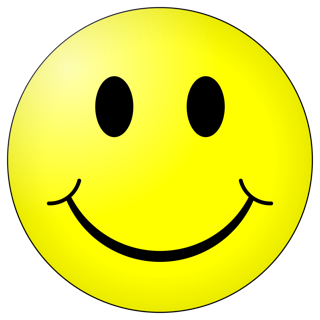

--- grey image ----



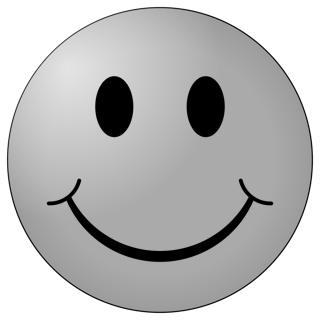

-- original image --



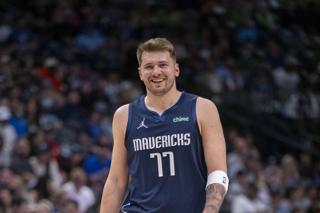

--- grey image ----



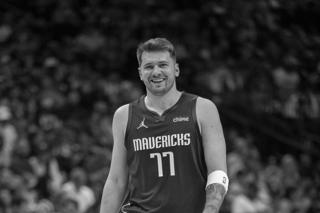

In [20]:
from IPython.display import HTML, display
from pathlib import Path  
from PIL import Image as pilImage 
from io import BytesIO
import base64
import numpy as np


def image_data(path=Path("../images/"), images=None):  
    if images is None:  
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Smile.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "luka.jpg"},
        ]
    for image in images:
        
        image['filename'] = path / image['file']  
    return images


def image_management_add_html_grey(image):
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data)
    image['gray_data'] = [] 

    for pixel in image['data']:
        
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3])) 
        else:
            image['gray_data'].append((average, average, average))

        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":

    images = image_data()
    
 
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

-- original image --



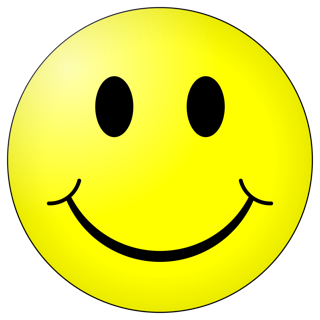

--- grey image ----



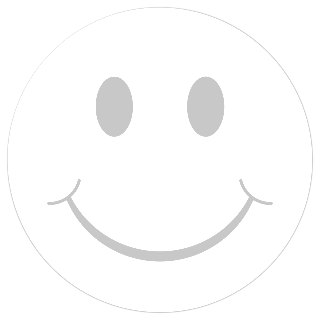

-- original image --



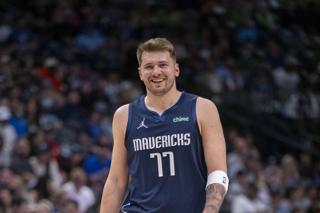

--- grey image ----



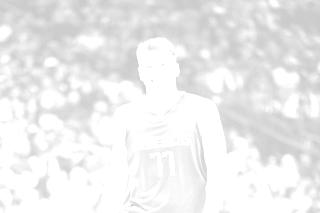

In [22]:
from IPython.display import HTML, display
from pathlib import Path  
from PIL import Image as pilImage 
from io import BytesIO
import base64
import numpy as np


def image_data(path=Path("../images/"), images=None):  
    if images is None:  
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Smile.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "luka.jpg"},
        ]
    for image in images:
        
        image['filename'] = path / image['file']  
    return images


def image_management_add_html_grey(image):
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data)
    image['gray_data'] = [] 

    for pixel in image['data']:
        
        average2 = (pixel[0] + pixel[1] + pixel[2]) // 3 
        average = average2 + 200 
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3])) 
        else:
            image['gray_data'].append((average, average, average))

        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":

    images = image_data()
    
 
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

In [ ]:
from PIL import Image, ImageFilter

# Load image
image = Image.open("luka.jpg")

# Apply Gaussian blur filter
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=5))

# Save blurred image
blurred_image.save("blurred_image.jpg")